# Data Science – Homework 2

Turn in ONE PDF file with answers to all the questions. 
You may also turn in a python notebook with supporting code if you feel it helps explain your answers.




In [1]:
# Load general utilities
# ----------------------
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import datetime
import numpy as np
import pickle
import time
import seaborn as sns
from sys import platform
import os

# Prep and preprocession section
Load the data and engineer features

In [2]:
# This is the code you can use to open your pickle file
# Read the data and features from the pickle
final_data, discrete_features, continuous_features, ret_cols = pickle.load( open( "Data/clean_data.pickle", "rb" ) )

In [3]:
# Create the outcome
final_data["default"] = final_data.loan_status.isin(["Charged Off", "Default"])

In [4]:
# Create a feature for the length of a person's credit history at the
# time the loan is issued
final_data['cr_hist'] = (final_data.issue_d - final_data.earliest_cr_line) / np.timedelta64(1, 'M')
continuous_features.append('cr_hist')

# Create X and y from the features

In [5]:
from sklearn.preprocessing import MinMaxScaler

def minMaxScaleContinuous(continuousList):
    return pd.DataFrame(MinMaxScaler().fit_transform(final_data[continuousList])
                             ,columns=list(final_data[continuousList].columns)
                             ,index = final_data[continuousList].index)

def createDiscreteDummies(discreteList):
    return pd.get_dummies(final_data[discreteList], dummy_na = True, prefix_sep = "::", drop_first = False)

In [6]:
final_data

,id,loan_amnt,funded_amnt,revol_util,revol_bal,fico_range_low,fico_range_high,pub_rec,open_acc,earliest_cr_line,...,term,int_rate,installment,verification_status,recoveries,loan_status,last_pymnt_d,total_pymnt,default,cr_hist
0,74121690,6000.0,6000.0,63.0,15055.0,675.0,679.0,0.0,16.0,2006-05-01,...,36 months,12.99,202.14,Not Verified,0.00,Fully Paid,2019-04-01,7268.153165,False,118.014744
2,74826201,7200.0,7200.0,18.4,9309.0,750.0,754.0,0.0,11.0,2001-12-01,...,36 months,5.32,216.83,Source Verified,0.00,Fully Paid,2016-04-01,7223.410000,False,170.976817
3,75061311,12000.0,12000.0,50.6,12152.0,670.0,674.0,0.0,10.0,1999-12-01,...,60 months,11.99,266.88,Not Verified,443.49,Charged Off,2018-11-01,8448.900000,True,194.993737
4,75091735,11425.0,11425.0,7.2,2096.0,730.0,734.0,0.0,11.0,2008-09-01,...,36 months,19.53,421.87,Source Verified,0.00,Fully Paid,2017-11-01,14331.034913,False,89.956673
6,75235366,20625.0,20625.0,63.6,10742.0,695.0,699.0,0.0,10.0,1990-05-01,...,36 months,10.75,672.80,Source Verified,0.00,Fully Paid,2018-09-01,24142.676489,False,310.018686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762896,154225862,25525.0,25525.0,30.8,13484.0,710.0,714.0,0.0,23.0,2006-11-01,...,36 months,20.00,948.61,Source Verified,0.00,Fully Paid,2019-07-01,25743.640001,False,151.953839
1762965,154311563,6000.0,6000.0,83.4,18852.0,705.0,709.0,0.0,8.0,2001-12-01,...,36 months,20.00,222.99,Not Verified,0.00,Fully Paid,2019-10-01,6333.814970,False,210.961211
1762976,153817414,12000.0,12000.0,15.7,1317.0,710.0,714.0,0.0,8.0,2006-12-01,...,60 months,15.24,287.00,Not Verified,0.00,Fully Paid,2019-10-01,12520.400076,False,150.968192
1763007,154053832,15000.0,15000.0,4.1,697.0,775.0,779.0,0.0,9.0,2006-12-01,...,36 months,8.81,475.68,Not Verified,0.00,Fully Paid,2019-09-01,15287.033886,False,150.968192


In [7]:
# data_type = pd.DataFrame(final_data.dtypes,columns=['dtypes'])

In [8]:
discrete_features_touse = discrete_features
continuous_features_touse = continuous_features

# Decision Tree Classifier   Question 1


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Create dummies for categorical features and concatenate with continuous features for X or predictor dataframe

# Use this line of code if you do not want to scale the continuous features
#X_continuous = data[continuous_features_touse]

# use this line if you want to scale the continuous features using the MinMaxScaler in the function defined above
X_continuous = minMaxScaleContinuous(continuous_features_touse)

# create numeric dummy features for the discrete features to be used in modeling
X_discrete = createDiscreteDummies(discrete_features_touse)


#split dataset in features and target variable
#concatenate the continuous and discrete features into one dataframe
X = pd.concat([X_continuous, X_discrete], axis = 1)

# this is the target variable 
target_col = "default"
y=final_data[target_col]


# create a test and train split of the transformed data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=.4)

print("Population:\n",y.value_counts())
print("Train:\n", y_train.value_counts())
print("Test:\n", y_test.value_counts())


Population:
 False    623662
True     164031
Name: default, dtype: int64
Train:
 False    374090
True      98525
Name: default, dtype: int64
Test:
 False    249572
True      65506
Name: default, dtype: int64


# Build Model with Decision Tree GridsearchCV
This is an example grid search with cross validation using a Decision Tree Classifier. Please note the following:

It does not use the selected features from the RFE above.
To use selected features: Replace X_train with rfecv_selected_train and Replace X_test with rfecv_selected_test
You can adjust these parameters or add others
The scoring method can be changed

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'criterion'   : ["gini", "entropy"],
              'max_depth'   : [3]
             }

print("Parameter grid:\n{}".format(parameters),'\n')

grid =  GridSearchCV(DecisionTreeClassifier(), parameters, cv=10, return_train_score=True, scoring='roc_auc', n_jobs=-1)

# perform grid search cv on training data.  The CV algorithm divides this into training and validation
dt_model = grid.fit(X_train, y_train)

print('best params ',dt_model.best_params_,'\n')
print('best estimator ',dt_model.best_estimator_,'\n')
print('best validation score ', dt_model.best_score_,'\n')
print('scoring method ', dt_model.scorer_)

print("Test set accuracy score: {:.7f}".format(dt_model.score(X_test, y_test)))


Parameter grid:
{'criterion': ['gini', 'entropy'], 'max_depth': [3]} 

best params  {'criterion': 'gini', 'max_depth': 3} 

best estimator  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') 

best validation score  0.9263783846569851 

scoring method  make_scorer(roc_auc_score, needs_threshold=True)
Test set accuracy score: 0.9256969


# VISUALIZE PERFORMANCE 
ROC Curve Function to create ROC curve for one model NOTE: This will not work with SVC models, as they do not have a predict_proba function

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, fbeta_score, classification_report

'''Function to print model accuracy information'''

def printAccuracyInfo(model, X_test, y_test):
    print(y_test.value_counts())
    # Make predictions against the test set
    pred = dt_model.predict(X_test)
    # Show the confusion matrix
    ''' confusion matrix returned with Predicted as the Columns and Actual as the Rows
         PN  PP
         AN [tn  fp] 
         AP [fn  tp]
    '''
    # Show the confusion matrix
    print("confusion matrix:")
    print(confusion_matrix(y_test, pred))
    tn,fp,fn,tp=confusion_matrix(y_test, pred).ravel()
    print('tn: ',tn)
    print('fp: ',fp)
    print('fn: ',fn)
    print('tp: ',tp)

    # Find the accuracy scores of the predictions against the true classes
    print("accuracy: %0.3f" % accuracy_score(y_test, pred))
    print("recall: %0.3f" % recall_score(y_test, pred, pos_label=True))
    print("precision: %0.3f" % precision_score(y_test, pred, pos_label=True))
    print("f-measure: %0.3f" % fbeta_score(y_test, pred, beta=1, pos_label=True))
    print(classification_report(y_test,pred))

In [12]:
# example use of printAccuracyInfo using gbc_model and X_test
# note: if you trained model using rfecv_selected_train, you need to call the function with rfecv_selected_test for X_test
printAccuracyInfo(dt_model, X_test, y_test)

False    249572
True      65506
Name: default, dtype: int64
confusion matrix:
[[249559     13]
 [ 14193  51313]]
tn:  249559
fp:  13
fn:  14193
tp:  51313
accuracy: 0.955
recall: 0.783
precision: 1.000
f-measure: 0.878
              precision    recall  f1-score   support

       False       0.95      1.00      0.97    249572
        True       1.00      0.78      0.88     65506

    accuracy                           0.95    315078
   macro avg       0.97      0.89      0.93    315078
weighted avg       0.96      0.95      0.95    315078



In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

'''Function to print confusion matrix for a model
   You may need to run this to update to scikit-learn version 0.22.1
         !pip install -U scikit-learn --user
'''

def plotConfusionMatrix (negative_label, positive_label, model, X_test, y_test):
    titles_options = [("Confusion matrix, without normalization", None,'d'),
                      ("Normalized confusion matrix", 'true','.3g')]
    for title, normalize,val_frmt in titles_options:
        disp = plot_confusion_matrix(model, X_test, y_test,
                                     display_labels=[negative_label,positive_label],
                                     cmap=plt.cm.Blues,
                                     values_format=val_frmt,
                                     normalize=normalize)
        disp.ax_.set_title(title)
        disp.ax_.set_xlabel('Predicted')
        disp.ax_.set_ylabel('Actual')

        print(title)
        print(disp.confusion_matrix)

    plt.show()

Confusion matrix, without normalization
[[249559     13]
 [ 14193  51313]]
Normalized confusion matrix
[[9.99947911e-01 5.20891767e-05]
 [2.16667176e-01 7.83332824e-01]]


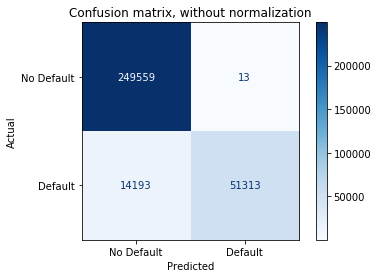

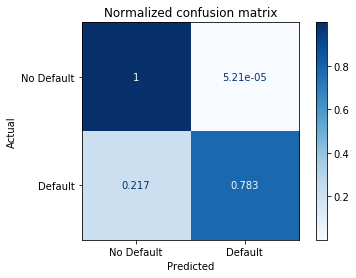

In [14]:
# example use of plotConfusionMatrix using gbc_model and X_test
# note: if you trained model using rfecv_selected_train, you need to call the function with rfecv_selected_test for X_test
plotConfusionMatrix('No Default', 'Default', dt_model, X_test, y_test)

In [15]:
def plot_roc_curve_1 (model, model_name, X_test, y_test):
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score
    from matplotlib import pyplot

    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]

    # predict probabilities
    cf_probs = model.predict_proba(X_test)

    # keep probabilities for the positive outcome only
    cf_probs = cf_probs[:, 1]

    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    cf_auc = roc_auc_score(y_test, cf_probs)

    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print(model_name,': ROC AUC=%.3f' % (cf_auc))

    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    cf_fpr, cf_tpr, _ = roc_curve(y_test, cf_probs)

    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(cf_fpr, cf_tpr, marker='.', label=model_name)

    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')

    # show the legend
    pyplot.legend()

    # show the plot
    pyplot.show()

No Skill: ROC AUC=0.500
dt_model : ROC AUC=0.926


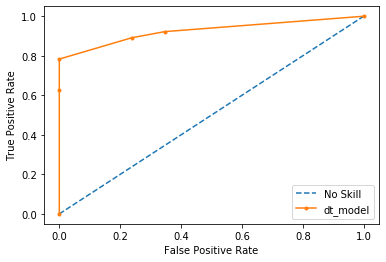

In [16]:
## example ROC plot for the decision tree model using X_test.
plot_roc_curve_1(dt_model, 'dt_model', X_test, y_test)

# Question 2 selecting optimal set features

# RFE with Cross Validation using Decision Tree

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV

dt = DecisionTreeClassifier()

rfecv = RFECV(estimator=dt,  min_features_to_select = 4, cv=10, n_jobs=-1)
rfecv.fit(X_train, y_train)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.title("Optimal number of features : %d" % rfecv.n_features_)
plt.show()

In [ ]:
# look at the ranking of each feature after using RFECV
pd.Series(rfecv.ranking_, index=X_train.columns).sort_values(ascending=True).head(10)

In [ ]:
# create new training and test datasets with the selected features only

rfecv_selected_train = pd.DataFrame(rfecv.transform(X_train)
                                    ,columns=list(X_train.columns[rfecv.get_support()])
                                    ,index=X_train.index)

rfecv_selected_test = pd.DataFrame(rfecv.transform(X_test)
                                    ,columns=list(X_test.columns[rfecv.get_support()])
                                    ,index=X_test.index)

print("train:", rfecv_selected_train.shape)
print("test:", rfecv_selected_test.shape)

In [ ]:
# get boolean mask of features selected and use the mask to find the feature names
list(X.columns[rfecv.get_support()])

# Build the model with GridSearchCV and optimal selected feature

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'criterion'   : ["gini", "entropy"],
              'max_depth'   : [3]
             }

print("Parameter grid:\n{}".format(parameters),'\n')

grid = GridSearchCV(DecisionTreeClassifier(), parameters, cv=10, return_train_score=True, scoring='roc_auc', n_jobs=-1)

# perform grid search cv on training data.  The CV algorithm divides this into training and validation
dt_model = grid.fit( rfecv_selected_train, y_train)

print('best params ',dt_model.best_params_,'\n')
print('best estimator ',dt_model.best_estimator_,'\n')
print('best validation score ', dt_model.best_score_,'\n')
print('scoring method ', dt_model.scorer_)

print("Test set accuracy score: {:.7f}".format(dt_model.score(rfecv_selected_test, y_test)))

#saveModel('dt_model', dt_model)

Parameter grid:
{'criterion': ['gini', 'entropy'], 'max_depth': [3]} 

best params  {'criterion': 'gini', 'max_depth': 3} 

best estimator  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') 

best validation score  0.9263783846569851 

scoring method  make_scorer(roc_auc_score, needs_threshold=True)
Test set accuracy score: 0.9256969


In [93]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, fbeta_score, classification_report

print(y_test.value_counts())

# Make predictions against the test set
pred = dt_model.predict(rfecv_selected_test)

# Show the confusion matrix
''' confusion matrix returned with Predicted as the Columns and Actual as the Rows
         PN  PP
     AN [tn  fp] 
     AP [fn  tp]
'''
print("confusion matrix:")
print(confusion_matrix(y_test, pred))
tn,fp,fn,tp=confusion_matrix(y_test, pred).ravel()
print('tn: ',tn)
print('fp: ',fp)
print('fn: ',fn)
print('tp: ',tp)

# Find the accuracy scores of the predictions against the true classes
print("accuracy: %0.3f" % accuracy_score(y_test, pred))
print("recall: %0.3f" % recall_score(y_test, pred))
print("precision: %0.3f" % precision_score(y_test, pred))
print("f-measure: %0.3f" % fbeta_score(y_test, pred, beta=1))
print(classification_report(y_test,pred))

False    249572
True      65506
Name: default, dtype: int64
confusion matrix:
[[249559     13]
 [ 14193  51313]]
tn:  249559
fp:  13
fn:  14193
tp:  51313
accuracy: 0.955
recall: 0.783
precision: 1.000
f-measure: 0.878
              precision    recall  f1-score   support

       False       0.95      1.00      0.97    249572
        True       1.00      0.78      0.88     65506

    accuracy                           0.95    315078
   macro avg       0.97      0.89      0.93    315078
weighted avg       0.96      0.95      0.95    315078



# VISUALIZE PERFORMANCE

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, fbeta_score, classification_report

'''Function to print model accuracy information'''

def printAccuracyInfo(model, X_test, y_test):
    print(y_test.value_counts())
    # Make predictions against the test set
    pred = dt_model.predict(X_test)
    # Show the confusion matrix
    ''' confusion matrix returned with Predicted as the Columns and Actual as the Rows
         PN  PP
         AN [tn  fp] 
         AP [fn  tp]
    '''
    # Show the confusion matrix
    print("confusion matrix:")
    print(confusion_matrix(y_test, pred))
    tn,fp,fn,tp=confusion_matrix(y_test, pred).ravel()
    print('tn: ',tn)
    print('fp: ',fp)
    print('fn: ',fn)
    print('tp: ',tp)

    # Find the accuracy scores of the predictions against the true classes
    print("accuracy: %0.3f" % accuracy_score(y_test, pred))
    print("recall: %0.3f" % recall_score(y_test, pred, pos_label=True))
    print("precision: %0.3f" % precision_score(y_test, pred, pos_label=True))
    print("f-measure: %0.3f" % fbeta_score(y_test, pred, beta=1, pos_label=True))
    print(classification_report(y_test,pred))

In [ ]:
# example use of printAccuracyInfo using gbc_model and X_test
# note: if you trained model using rfecv_selected_train, you need to call the function with rfecv_selected_test for X_test
printAccuracyInfo(dt_model, X_test, y_test)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

'''Function to print confusion matrix for a model
   You may need to run this to update to scikit-learn version 0.22.1
         !pip install -U scikit-learn --user
'''

def plotConfusionMatrix (negative_label, positive_label, model, X_test, y_test):
    titles_options = [("Confusion matrix, without normalization", None,'d'),
                      ("Normalized confusion matrix", 'true','.3g')]
    for title, normalize,val_frmt in titles_options:
        disp = plot_confusion_matrix(model, X_test, y_test,
                                     display_labels=[negative_label,positive_label],
                                     cmap=plt.cm.Blues,
                                     values_format=val_frmt,
                                     normalize=normalize)
        disp.ax_.set_title(title)
        disp.ax_.set_xlabel('Predicted')
        disp.ax_.set_ylabel('Actual')

        print(title)
        print(disp.confusion_matrix)

    plt.show()

In [ ]:
# example use of plotConfusionMatrix using gbc_model and X_test
# note: if you trained model using rfecv_selected_train, you need to call the function with rfecv_selected_test for X_test
plotConfusionMatrix('No Default', 'Default', dt_model, X_test, y_test)

In [ ]:
def plot_roc_curve_1 (model, model_name, X_test, y_test):
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score
    from matplotlib import pyplot

    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]

    # predict probabilities
    cf_probs = model.predict_proba(X_test)

    # keep probabilities for the positive outcome only
    cf_probs = cf_probs[:, 1]

    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    cf_auc = roc_auc_score(y_test, cf_probs)

    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print(model_name,': ROC AUC=%.3f' % (cf_auc))

    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    cf_fpr, cf_tpr, _ = roc_curve(y_test, cf_probs)

    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(cf_fpr, cf_tpr, marker='.', label=model_name)

    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')

    # show the legend
    pyplot.legend()

    # show the plot
    pyplot.show()

In [ ]:
## example ROC plot for the decision tree model using X_test.
plot_roc_curve_1(dt_model, 'dt_model', X_test, y_test)

In [13]:
# for param in grid.get_params().keys():
#     print(param)